### 1. Base de datos

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [25]:
df=pd.read_csv("heart_disease_uci.csv")

In [26]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### 2.Variable objetivo

In [27]:
# Definir la variable objetivo (y)
y = df['num']

# Definir las variables descriptivas (X) excluyendo la variable objetivo
X = df.drop('num', axis=1)

In [28]:
# Ahora 'X' contiene todas las columnas excepto 'num', que es lo que queremos usar para predecir 'y'
print("Primeras filas de X (variables descriptivas):")
print(X.head())

print("\nPrimeras filas de y (variable objetivo):")
print(y.head())


Primeras filas de X (variables descriptivas):
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca               thal  
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0       fixed defect  
1  lv hypertrophy   108.0   True      1.5         flat  3.0             normal  
2  lv hypertrophy   129.0   True      2.6         flat  2.0  reversable defect  
3          normal   187.0  False      3.5  downsloping  0.0             normal  
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0             normal  

Primeras filas de y (v

In [29]:


mapping = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}
y_binary = df['num'].map(mapping)

print("Valores únicos de y_binary después de la corrección:", y_binary.unique())

print("\nPrimeras filas de y_binary (variable objetivo binarizada):")
print(y_binary.head())
print("\nConteo de valores en y_binary:")
print(y_binary.value_counts())

Valores únicos de y_binary después de la corrección: [0 1]

Primeras filas de y_binary (variable objetivo binarizada):
0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

Conteo de valores en y_binary:
num
1    509
0    411
Name: count, dtype: int64


In [31]:


from sklearn.model_selection import train_test_split

### 3.Separación en entrenamiento y prueba

In [42]:
# Variables predictoras elegidas
X = df[['age', 'chol', 'thalch']]  # Puedes elegir diferentes si quieres

# Variable objetivo
y = df['num']

# División en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 4.Variables descriptivas

In [36]:
#modelo de regresión logística
from sklearn.linear_model import LogisticRegression

In [ ]:
print("Tipo de datos de y_binary:", y_binary.dtype)

Tipo de datos de y_binary: int64


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
caracteristicas=("age", )

Tipo de datos de X['age']: int64
Valores únicos de X['age']: [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40]


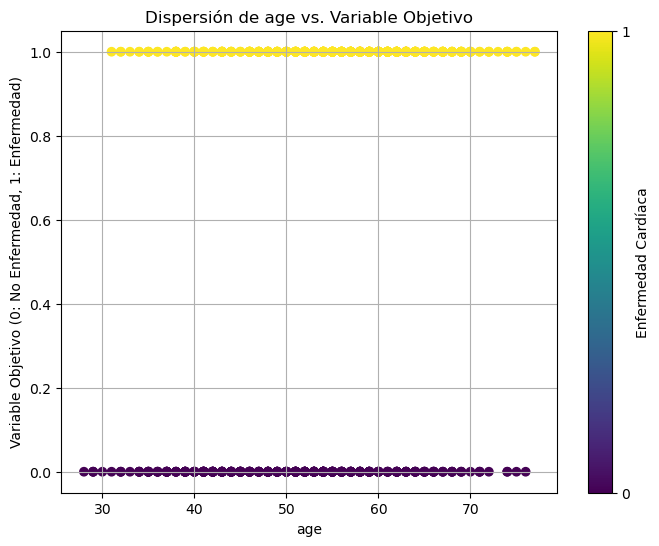

Tipo de datos de X['chol']: float64
Valores únicos de X['chol']: [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211.]


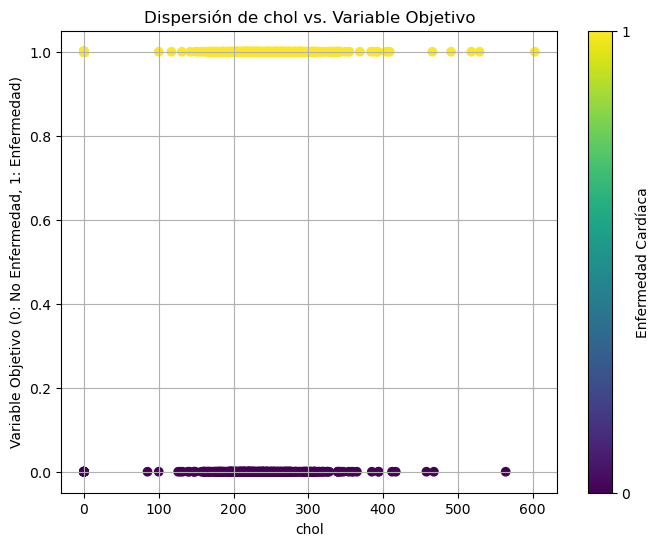

KeyError: 'thalach'

In [40]:

for caracteristica in caracteristicas:
    print(f"Tipo de datos de X['{caracteristica}']:", X[caracteristica].dtype)
    print(f"Valores únicos de X['{caracteristica}']:", X[caracteristica].unique()[:20]) # Muestra los primeros 20 valores únicos
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[caracteristica], y_binary, c=y_binary, cmap='viridis')
    plt.title(f'Dispersión de {caracteristica} vs. Variable Objetivo')
    plt.xlabel(caracteristica)
    plt.ylabel('Variable Objetivo (0: No Enfermedad, 1: Enfermedad)')
    plt.colorbar(scatter, ticks=[0, 1], label='Enfermedad Cardíaca')
    plt.grid(True)
    plt.show()

In [ ]:
logreg.fit(X_entrenamiento,y_entrenamiento)

ValueError: could not convert string to float: 'Female'